<a href="https://colab.research.google.com/github/Achrajpachauri/Generative-AI-Project/blob/main/Tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
## import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## divide the data independent and dependent feature

x = data.iloc[:,3:13]
y = data.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
## feature engineering
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender =pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
## concatenate to dataframe
x = x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
x = pd.concat([x,gender,geography],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True


In [ ]:
## splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
## feature scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
##part 2 lets create ANN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

## lets create ANN

classifier = Sequential()

## add input Layer

classifier.add(Dense(units=11,activation='relu'))

## add first hidden layer

classifier.add(Dense(units=7,activation='relu'))

## add hidden layer second

classifier.add(Dense(units=6,activation='relu'))

##output layer

classifier.add(Dense(units=1,activation='sigmoid'))



In [ ]:
## give optimizer and loss function
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
### train the ANN model
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3314 - accuracy: 0.8634 - val_loss: 0.3679 - val_accuracy: 0.8429
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3303 - accuracy: 0.8660 - val_loss: 0.3632 - val_accuracy: 0.8436
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3293 - accuracy: 0.8671 - val_loss: 0.3658 - val_accuracy: 0.8417


In [ ]:
## early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

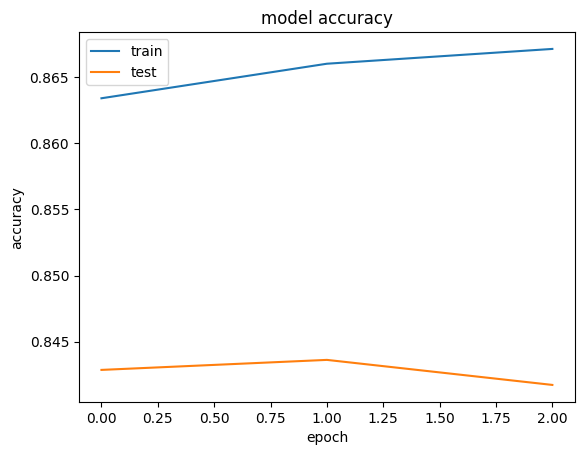

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.8615

In [ ]:
## get the weights

classifier.get_weights()

[array([[ 0.01565791,  0.25197658, -0.08321188, -0.22914957,  0.0618679 ,
          0.17542155, -0.11018782,  0.04549204,  0.14807382, -0.11919811,
         -0.01064165],
        [-0.26589626, -0.5825198 , -0.4350531 ,  0.56920844,  0.34796676,
          0.29854947, -0.2217504 , -0.82826924, -0.11164377,  0.33826956,
         -0.8969426 ],
        [-0.10268094,  0.04774139,  0.03294363, -0.21860908,  0.1064752 ,
          0.08137684,  0.02642414,  0.14327197,  0.14339775,  0.50968295,
         -0.16871959],
        [-0.06261834, -0.3994864 , -0.14269081,  0.18999238,  0.04996258,
         -0.07871387, -0.59158635, -0.05822335,  0.09326978, -0.6585489 ,
         -0.09684654],
        [ 0.72600347,  0.00921633, -0.0662025 ,  0.6382985 , -0.7267411 ,
         -0.03031582, -0.799326  , -0.03601424,  1.0838045 ,  0.09346447,
          0.02504221],
        [-0.08724412, -0.23554748, -0.43873397,  0.10267708, -0.2509121 ,
         -0.02454325,  0.02180086, -0.15646136, -0.15004252,  0.1003018